In [1676]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.metrics import r2_score


In [1677]:
df = pd.read_csv('diamonds.csv')

df = df.drop(['Unnamed: 0','color','cut','clarity'],axis=1)

df = df[(df.z != 0) & (df.x != 0) & (df.y != 0)]
df1 = df[df.y < 30 ]
df1 = df1[df1.z < 20 ]

df1 = np.log(df1)

df1

,carat,depth,table,price,x,y,z
0,-1.469676,4.119037,4.007333,5.786897,1.373716,1.381282,0.887891
1,-1.560648,4.091006,4.110874,5.786897,1.358409,1.345472,0.837248
2,-1.469676,4.041295,4.174387,5.789960,1.398717,1.403643,0.837248
3,-1.237874,4.133565,4.060443,5.811141,1.435085,1.442202,0.966984
4,-1.171183,4.147885,4.060443,5.814131,1.467874,1.470176,1.011601
...,...,...,...,...,...,...,...
53935,-0.328504,4.107590,4.043051,7.921898,1.749200,1.750937,1.252763
53936,-0.328504,4.144721,4.007333,7.921898,1.738710,1.749200,1.283708
53937,-0.356675,4.139955,4.094345,7.921898,1.733424,1.736951,1.269761
53938,-0.150823,4.110874,4.060443,7.921898,1.816452,1.811562,1.319086


In [1678]:
df1.shape

(53917, 7)

In [1680]:
from sklearn.linear_model import LinearRegression

X = df1.drop(['price','y','z'], axis=1)
y = df1['price']


In [1681]:
lm = LinearRegression()

In [1682]:
from sklearn.model_selection import train_test_split

In [1683]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.2, 
                                                    random_state=49)


In [1684]:
lm.fit(X_train,y_train)

LinearRegression()

In [1685]:
print(r2_score(y_train, lm.predict(X_train)))
print(r2_score(y_test, lm.predict(X_test)))

0.9352646194385423
0.9351270108378842


In [1686]:
print("Skewness:" ,df1['price'].skew())
print("Kurtosis:" ,df1['price'].kurt()) #No. of outlier ove 3 is bad

Skewness: 0.11546017047276892
Kurtosis: -1.0970093214536945


In [1687]:
beta_0  = float(lm.intercept_)
beta_0

14.115369515483703

In [1688]:
beta_js = pd.DataFrame(lm.coef_, X.columns, columns=['Coefficient'])
beta_js

,Coefficient
carat,1.236637
depth,-1.053179
table,-0.953639
x,1.368736


In [1689]:
print('The R-square for train is: ', lm.score(X_train, y_train))
print('The R-square for test is: ', lm.score(X_test, y_test))

The R-square for train is:  0.9352646194385423
The R-square for test is:  0.9351270108378842


<AxesSubplot:>

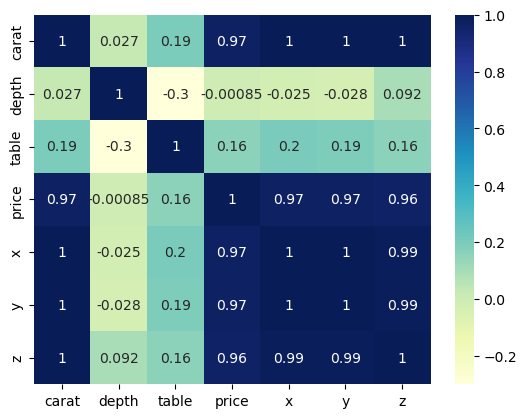

In [1690]:
sns.heatmap(df1.corr(), cmap="YlGnBu", annot=True,xticklabels=True)

In [1691]:
print("Intercept:", beta_0)

Intercept: 14.115369515483703


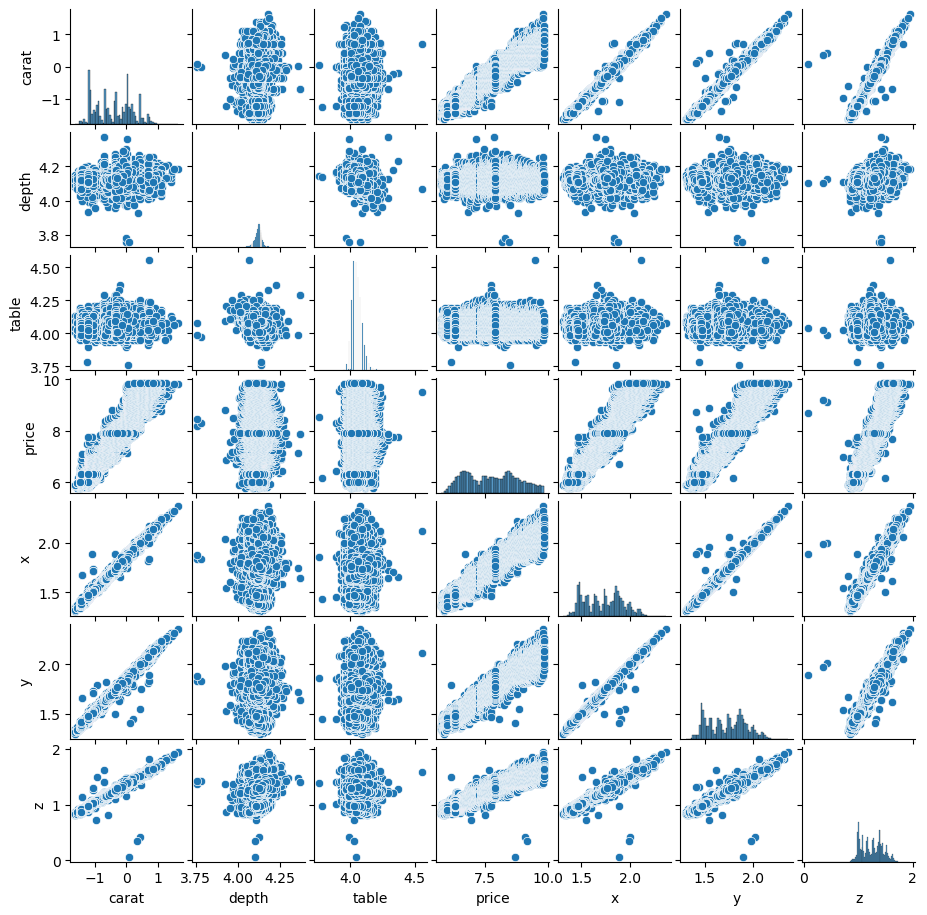

In [1692]:
pair = sns.pairplot(df1)
pair.fig.set_size_inches(9,9)

In [1693]:
slr = LinearRegression()

slr.fit(X_train[['carat']], y_train)

LinearRegression()

In [1695]:
from sklearn.metrics import mean_squared_error 
import math
results_dict = {'Training MSE':
                    {
                        "SLR": mean_squared_error(y_train, slr.predict(X_train[['carat']])),
                        "MLR": mean_squared_error(y_train, lm.predict(X_train))
                    },
                'Test MSE':
                    {
                        "SLR": mean_squared_error(y_test, slr.predict(X_test[['carat']])),
                        "MLR": mean_squared_error(y_test, lm.predict(X_test)),
                    },
                'Test RMSE':
                    {
                        "SLR": math.sqrt(mean_squared_error(y_test, slr.predict(X_test[['carat']]))),
                        "MLR": math.sqrt(mean_squared_error(y_test, lm.predict(X_test)))
                    }
                }
results_dict



{'Training MSE': {'SLR': 0.06873273808108755, 'MLR': 0.06650141214326855},
 'Test MSE': {'SLR': 0.06985640890215727, 'MLR': 0.067287005009898},
 'Test RMSE': {'SLR': 0.2643036301342781, 'MLR': 0.2593973882094768}}

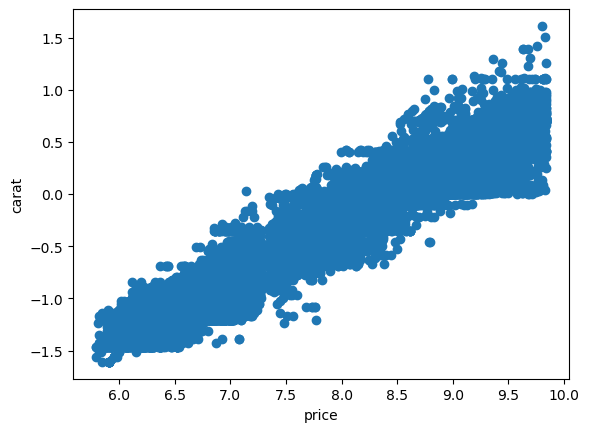

In [1696]:
plt.scatter(df1['price'], df1['carat'])
plt.ylabel("carat")
plt.xlabel("price")
plt.show()

Slope = 1.6759286625561407
Intercept = 8.448749058950195


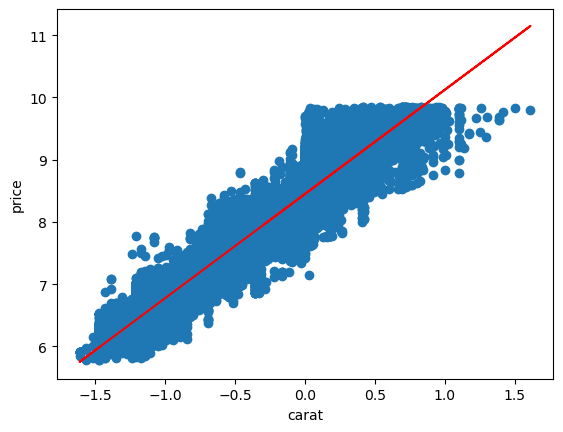

In [1697]:
X = df1.carat.values
Y = df1.price.values

# Calculate x bar, y bar
x_bar = np.mean(X)
y_bar = np.mean(Y)

# Calculate slope
b = sum( (X-x_bar)*(Y-y_bar) ) / sum( (X-x_bar)**2 )

# Calculate intercept
a = y_bar - b*x_bar

print("Slope = " + str(b))
print("Intercept = " + str(a))

def gen_y(x_list, a, b):
    y_gen = []
    for x_i in x_list:
        y_i = a + b*x_i
        y_gen.append(y_i)
    
    return(y_gen)

# Generate the values by invoking the 'gen_y' function
y_gen = gen_y(df1.carat,a,b)

plt.scatter(df1.carat, df1.price)  # Plot the original data
plt.plot(df1.carat, y_gen, color='red')
plt.ylabel("price")
plt.xlabel("carat")
plt.show()


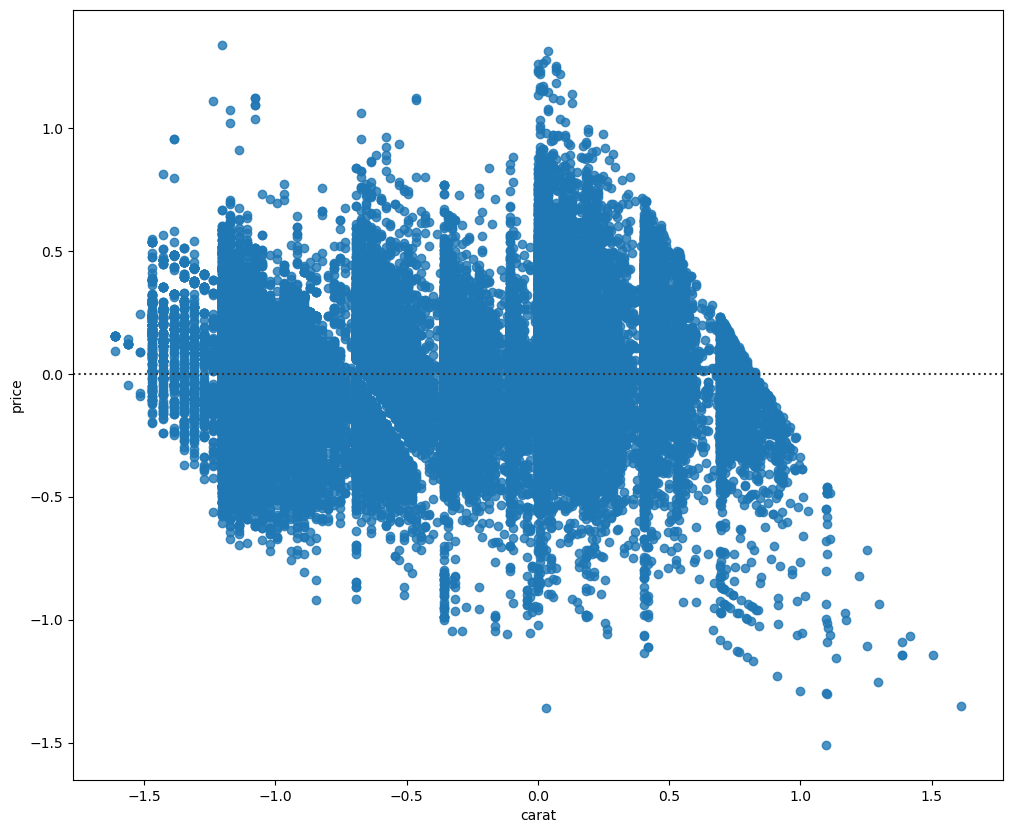

In [1698]:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.residplot(x="carat", y="price", data=df1)
plt.show()


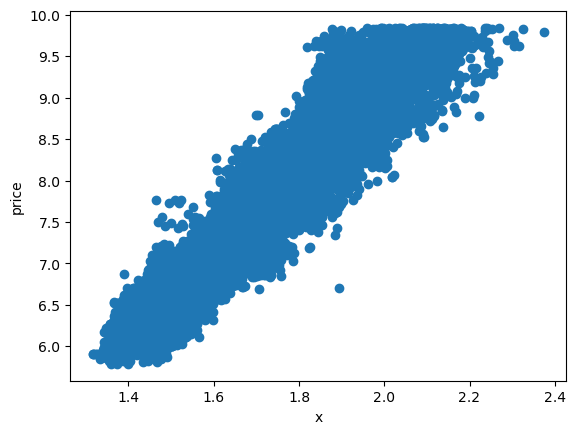

In [1699]:
plt.scatter(df1['x'], df1['price'])
plt.ylabel("price")
plt.xlabel("x")
plt.show()

Slope = 5.059979780162368
Intercept = -0.9530811463536493


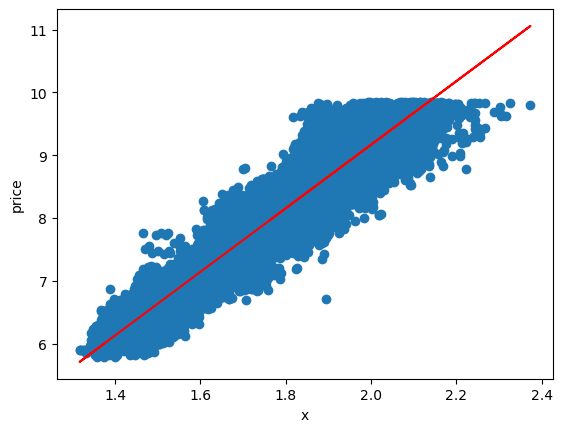

In [1700]:
X = df1.x.values
Y = df1.price.values

# Calculate x bar, y bar
x_bar = np.mean(X)
y_bar = np.mean(Y)

# Calculate slope
b = sum( (X-x_bar)*(Y-y_bar) ) / sum( (X-x_bar)**2 )

# Calculate intercept
a = y_bar - b*x_bar

print("Slope = " + str(b))
print("Intercept = " + str(a))

def gen_y(x_list, a, b):
    y_gen = []
    for x_i in x_list:
        y_i = a + b*x_i
        y_gen.append(y_i)
    
    return(y_gen)

# Generate the values by invoking the 'gen_y' function
y_gen = gen_y(df1.x,a,b)
plt.scatter(df1.x, df1.price)  # Plot the original data
plt.plot(df1.x, y_gen, color='red')
plt.ylabel("price")
plt.xlabel("x")
plt.show()


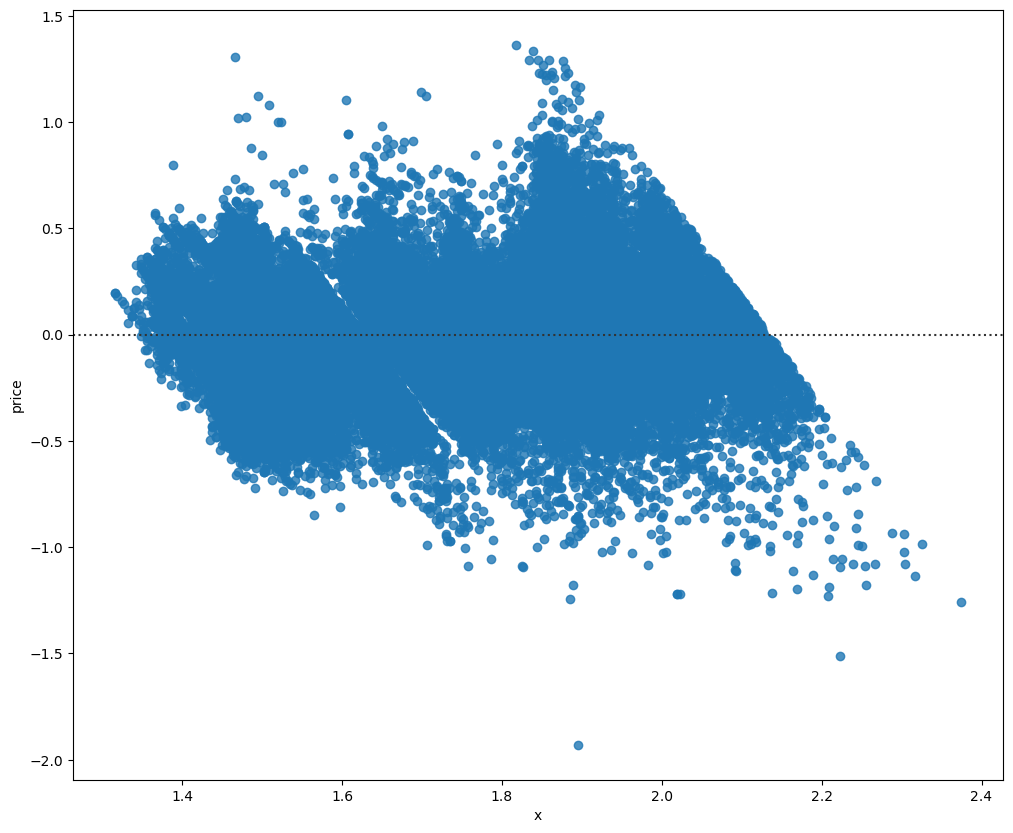

In [1702]:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.residplot(x="x", y="price", data=df1)
plt.show()

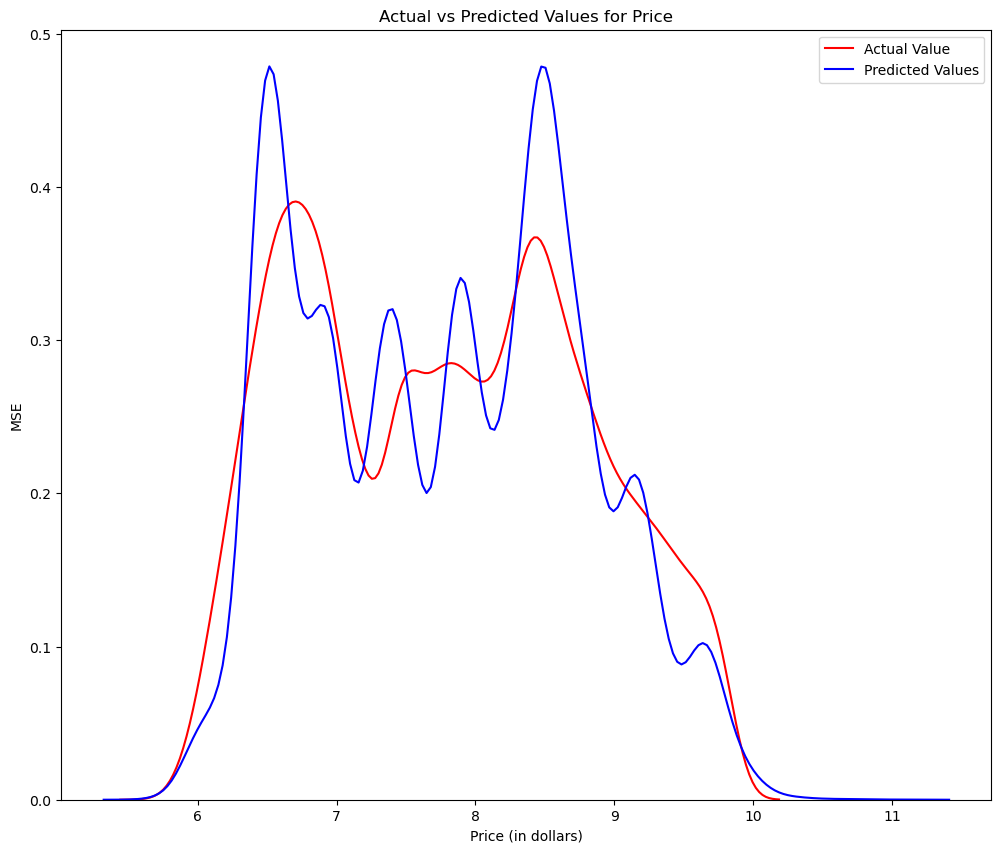

In [1703]:
import warnings
warnings.filterwarnings('ignore')
Y_hat = lm.predict(X_train)
plt.figure(figsize=(width, height))


ax1 = sns.distplot(df1['price'], hist=False, color="r", label="Actual Value")
sns.distplot(Y_hat, hist=False, color="b", label="Predicted Values" , ax=ax1)
plt.title('Actual vs Predicted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('MSE')
plt.legend()
plt.show()
plt.close()

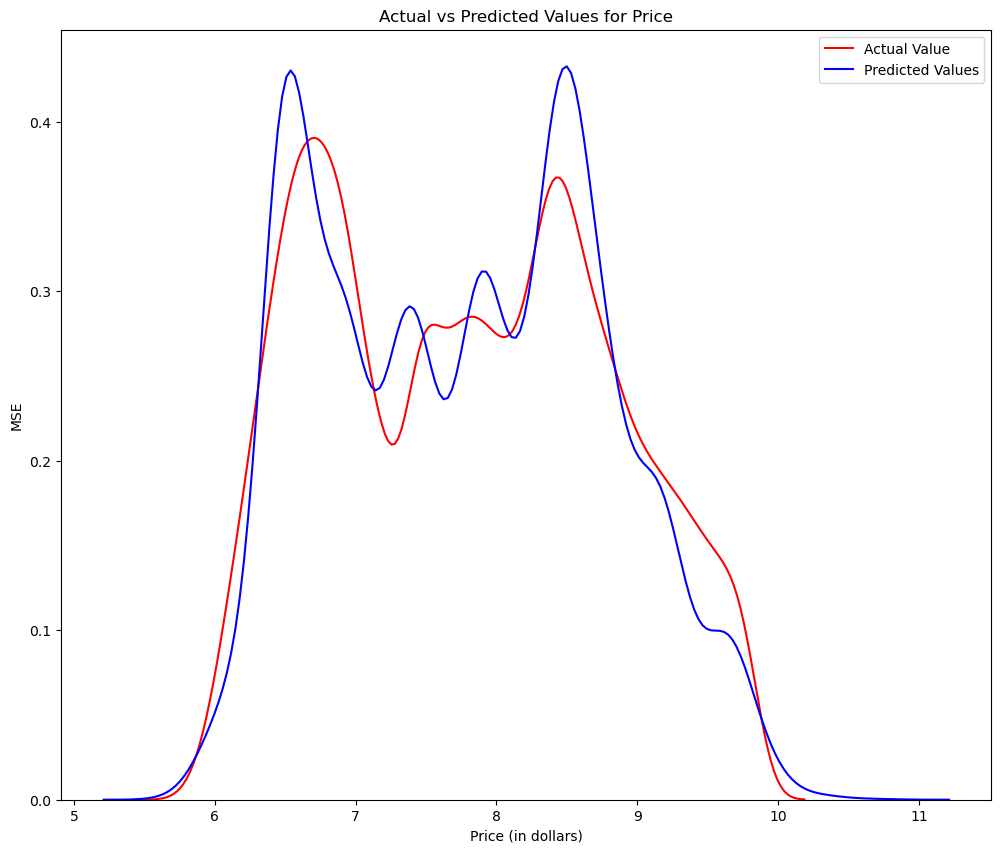

In [1704]:
import warnings
warnings.filterwarnings('ignore')
Y_hat = lm.predict(X_test)
plt.figure(figsize=(width, height))


ax1 = sns.distplot(df1['price'], hist=False, color="r", label="Actual Value")
sns.distplot(Y_hat, hist=False, color="b", label="Predicted Values" , ax=ax1)
plt.title('Actual vs Predicted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('MSE')
plt.legend()
plt.show()
plt.close()

In [1705]:
import statsmodels.formula.api as sm
formula_str = df1.columns[0]+' ~ '+'+'.join(df1.columns[0:1]); formula_str
model=sm.ols(formula=formula_str, data=df1)
fitted = model.fit()
print(fitted.summary())

                            OLS Regression Results                            
Dep. Variable:                  carat   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.332e+32
Date:                Wed, 11 Jan 2023   Prob (F-statistic):               0.00
Time:                        15:16:37   Log-Likelihood:             1.6679e+06
No. Observations:               53917   AIC:                        -3.336e+06
Df Residuals:                   53915   BIC:                        -3.336e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.422e-15   4.62e-17     52.400      0.0

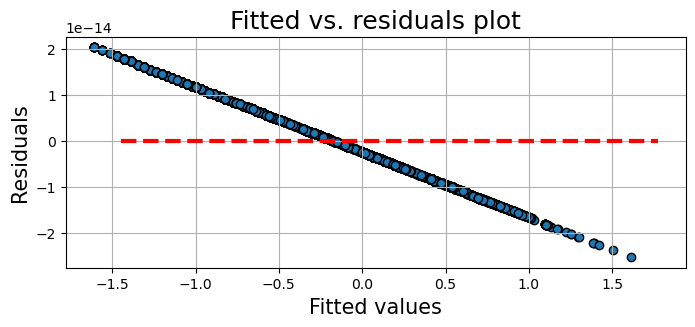

In [1706]:
plt.figure(figsize=(8,3))
p=plt.scatter(x=fitted.fittedvalues,y=fitted.resid,edgecolor='k')
xmin = min(fitted.fittedvalues)
xmax = max(fitted.fittedvalues)
plt.hlines(y=0,xmin=xmin*0.9,xmax=xmax*1.1,color='red',linestyle='--',lw=3)
plt.xlabel("Fitted values",fontsize=15)
plt.ylabel("Residuals",fontsize=15)
plt.title("Fitted vs. residuals plot",fontsize=18)
plt.grid(True)
plt.show()

In [1707]:
from scipy import stats

# Perform the Shapiro-Wilk test
w_stat, p_val = stats.shapiro(df1)

# Print the test statistic and p-value
print("W-statistic: ", w_stat)
print("p-value: ", p_val)

# Compare the p-value to the significance level (alpha = 0.05)
if p_val < 0.05:
    print("The data is not normally distributed (reject H0).")
else:
    print("The data is normally distributed (fail to reject H0).")

W-statistic:  0.9108802676200867
p-value:  0.0
The data is not normally distributed (reject H0).


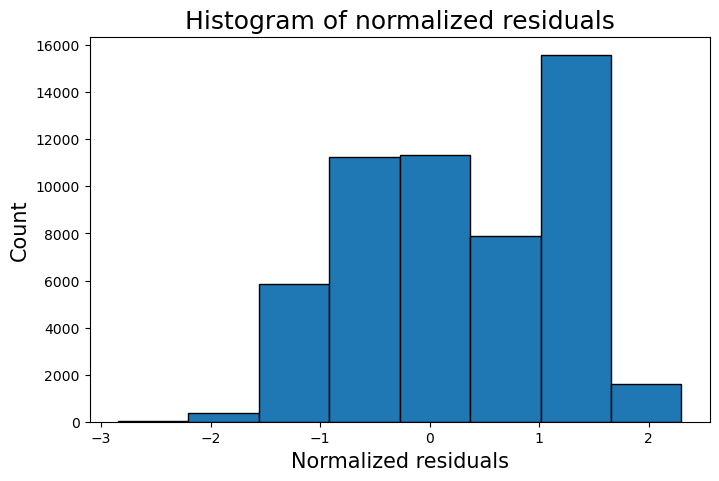

In [1708]:
plt.figure(figsize=(8,5))
plt.hist(fitted.resid_pearson,bins=8,edgecolor='k')
plt.ylabel('Count',fontsize=15)
plt.xlabel('Normalized residuals',fontsize=15)
plt.title("Histogram of normalized residuals",fontsize=18)
plt.show()

<Figure size 800x500 with 0 Axes>

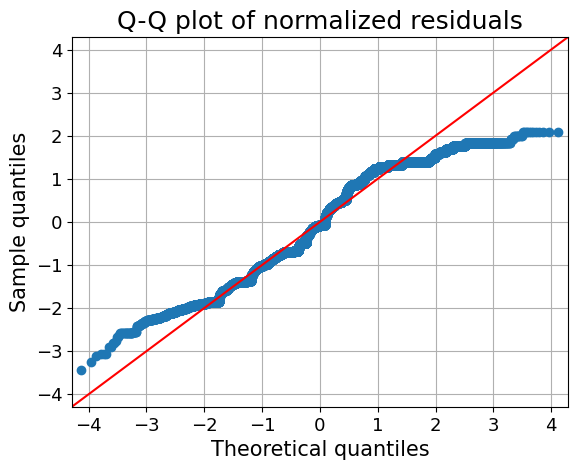

In [1709]:
from statsmodels.graphics.gofplots import qqplot

plt.figure(figsize=(8,5))
fig=qqplot(fitted.resid_pearson,line='45',fit='True')
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.xlabel("Theoretical quantiles",fontsize=15)
plt.ylabel("Sample quantiles",fontsize=15)
plt.title("Q-Q plot of normalized residuals",fontsize=18)
plt.grid(True)
plt.show()